In [1]:
%pylab nbagg

import math
import os

from collections import namedtuple

from h5py import File
from matplotlib import pyplot
from scipy.integrate import quad
from scipy.optimize import curve_fit, brentq

from soleil import DatasetPathContains, get_dataset

Populating the interactive namespace from numpy and matplotlib


In [2]:
ROOT = "/home/experiences/instrumentation/picca/jupyter/mars/99180191/"
PUBLISHED = os.path.join(ROOT, "published-data")

In [3]:
# read all the spectra
Spectrum = namedtuple('Spectrum', "x y")

numbers = [67, 66, 64, 63, 62, 41, 44, 47, 50, 53,
           56, 60, 69, 72, 75, 78, 81, 84, 88, 91,
           94, 97, 100, 105]

es = [0.838, 1, 0.969, 0.93, 0.873, 0.909, 0.896, 0.767, 0.824, 0.812,
      0.693, 0.728, 0.905, 0.851, 0.809, 0.790, 0.770, 0.781, 0.784, 0.983,
      0.812, 0.754, 0.737, 0.816]

files = [os.path.join(ROOT, "scan_{}_01.nxs".format(d)) for d in numbers]

def getSpectrum(filename: str):
    path_x = DatasetPathContains("scan_data/actuator_1_1")
    path_y = DatasetPathContains("scan_data/data_01")
    
    with File(filename, mode='r') as h5file:
        return Spectrum(get_dataset(h5file, path_x)[:],
                        get_dataset(h5file, path_y)[:])

spectra = [getSpectrum(f) for f in files]

<IPython.core.display.Javascript object>


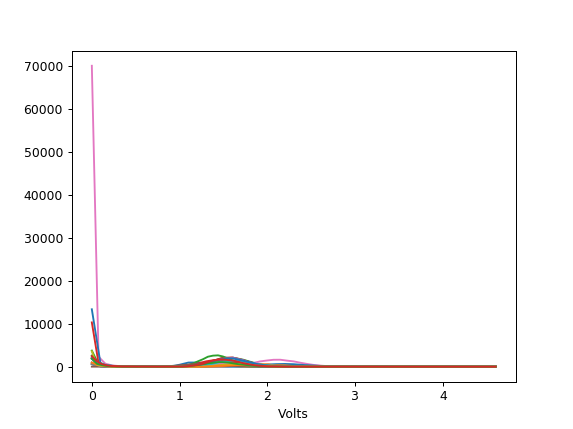

In [4]:
# plot all the MAO spectra

pyplot.figure()

for s in spectra:
    pyplot.plot(s.x, s.y)

pyplot.xlabel("Volts")
pyplot.show()

<IPython.core.display.Javascript object>


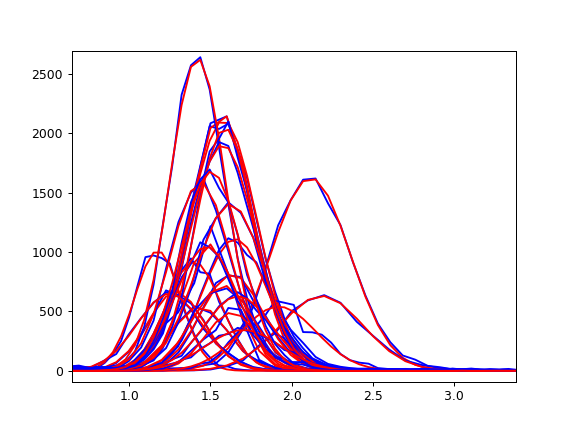

[(array([  1.01067137e+03,   1.17529823e+00,   1.42716270e-01]), 144.23924799827122), (array([  1.11034370e+03,   1.65229250e+00,   1.99592185e-01]), 221.6159252432364), (array([  2.10823919e+03,   1.57991735e+00,   2.05521138e-01]), 433.2877191888335), (array([  2.17283898e+03,   1.56778417e+00,   1.93447918e-01]), 420.33117670383047), (array([  8.12741939e+02,   1.63318880e+00,   1.89680326e-01]), 154.16115570055823), (array([  5.42402667e+02,   1.43489899e+00,   1.71993778e-01]), 93.28988367212713), (array([  1.62447535e+03,   2.11549165e+00,   2.44522320e-01]), 397.220482604545), (array([  9.17367891e+02,   1.39843210e+00,   1.69154849e-01]), 155.17722661108178), (array([  6.65275878e+02,   1.28831830e+00,  -1.75023498e-01]), 116.43891113122245), (array([  1.06627880e+03,   1.49046676e+00,  -1.60843866e-01]), 171.5044047764514), (array([  6.30942854e+02,   2.18433268e+00,   2.54196566e-01]), 160.38350643733378), (array([  5.40990447e+02,   1.91870647e+00,   2.32048084e-01]), 125.53

In [5]:
def func(x, a, x0,sigma):
    return a*np.exp(-np.power((x - x0)/sigma, 2.)/2.)


def func2(x, a, x0, sigma, e):
    return quad(func, x0-x, x0+x, args=(a, x0, sigma))[0] - e*math.fabs(a * sigma)

pyplot.figure()

popts = []
for i, (xdata, ydata) in enumerate(spectra):
    popt, pcov = curve_fit(func, xdata[1:], ydata[1:])
    popts.append(popt)

    pyplot.plot(xdata, ydata, "b")
    pyplot.plot(xdata, func(xdata, *popt), "r")

pyplot.show()

print([(popt, math.fabs(popt[0] * popt[2])) for popt in popts])

In [6]:
for e, popt in zip(es, popts):
    res = brentq(func2, 0, 1, args=tuple(popt)+(e,))
    print(popt, res, popt[1] - res, popt[1] + res)

[  1.01067137e+03   1.17529823e+00   1.42716270e-01] 0.061664237216058654 1.11363399276 1.23696246719
[  1.11034370e+03   1.65229250e+00   1.99592185e-01] 0.10436277436904734 1.54792972758 1.75665527632
[  2.10823919e+03   1.57991735e+00   2.05521138e-01] 0.10382735942076621 1.47608998572 1.68374470456
[  2.17283898e+03   1.56778417e+00   1.93447918e-01] 0.09346587496047064 1.47431829459 1.66125004452
[  8.12741939e+02   1.63318880e+00   1.89680326e-01] 0.08561588019646063 1.54757292223 1.71880468262
[  5.42402667e+02   1.43489899e+00   1.71993778e-01] 0.08107633682025153 1.35382265284 1.51597532648
[  1.62447535e+03   2.11549165e+00   2.44522320e-01] 0.11349249704983036 2.00199914936 2.22898414346
[  9.17367891e+02   1.39843210e+00   1.69154849e-01] 0.06654844912043102 1.3318836465 1.46498054474
[  6.65275878e+02   1.28831830e+00  -1.75023498e-01] 0.07428058683363031 1.21403771202 1.36259888568
[  1.06627880e+03   1.49046676e+00  -1.60843866e-01] 0.06720815255093922 1.42325860839 1.55